In [1]:
import keras
import tensorflow as tf
%matplotlib inline

import matplotlib.pyplot as plt

/home/nicola/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas as pd  
from random import random
import numpy as np


flow = (list(range(1,10,1)) + list(range(10,1,-1)))*100 

print(type(flow))

X = np.array(flow)
print(X)
print(X.shape)

<class 'list'>
[1 2 3 ... 4 3 2]
(1800,)


In [3]:
def _load_data(data, n_prev = 50):  

    docX, docY = [], []
    for i in range(data.shape[0]-n_prev):
        docX.append(data[i:i+n_prev])
        docY.append(data[i+n_prev])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(vec, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(vec.shape[0] * (1 - test_size))

    X_train, y_train = _load_data(vec[0:ntrn])
    X_test, y_test = _load_data(vec[ntrn:])

    return (X_train, y_train), (X_test, y_test)

In [4]:
(X_train, y_train), (X_test, y_test) = train_test_split(X) 

In [5]:
print("X_train.shape:   {}".format(X_train.shape))
print("y_train.shape:   {}".format(y_train.shape))
print("X_test.shape:    {}".format(X_test.shape))
print("y_test.shape:    {}".format(y_test.shape))

X_train.shape:   (1570, 50)
y_train.shape:   (1570,)
X_test.shape:    (130, 50)
y_test.shape:    (130,)


In [6]:
print(X_train[0])
print(y_train[0])

[ 1  2  3  4  5  6  7  8  9 10  9  8  7  6  5  4  3  2  1  2  3  4  5  6
  7  8  9 10  9  8  7  6  5  4  3  2  1  2  3  4  5  6  7  8  9 10  9  8
  7  6]
5


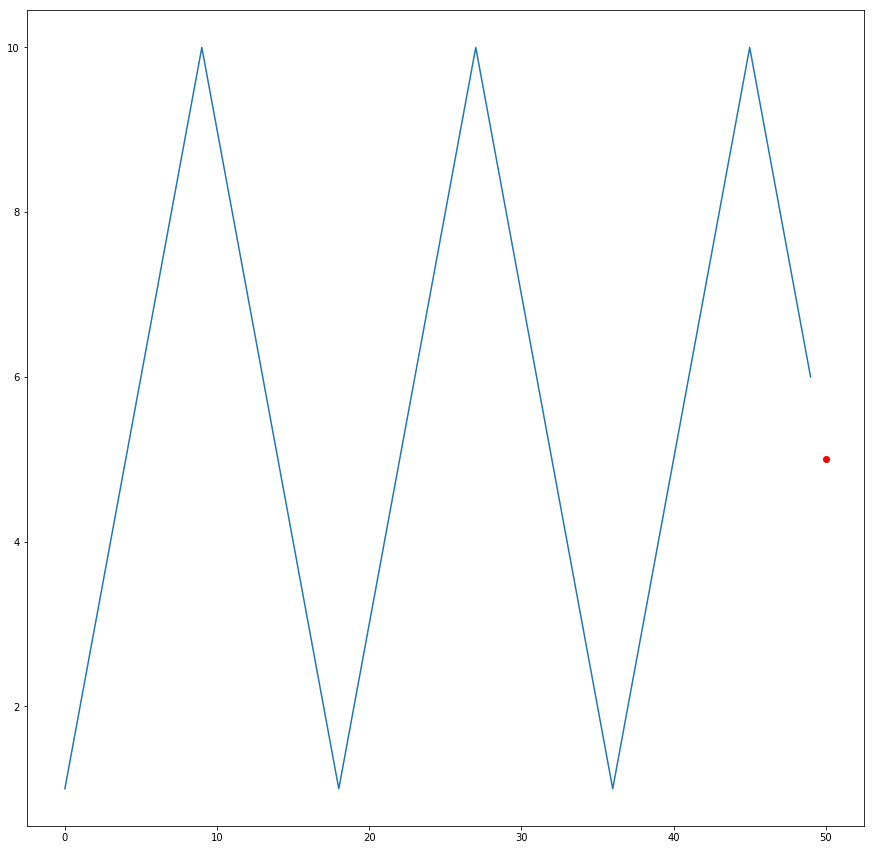

In [7]:
plt.figure(figsize=(15,15))
plt.plot(X_train[0,:])
plt.plot(50, y_train[0], 'ro')

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

print(X_train.shape)

enc = OneHotEncoder()
enc.fit(X_train[:,])

tr = enc.transform(X_train).toarray()

print(tr.shape)

tr = tr.reshape((1570,50,10))
print(tr.shape)

(1570, 50)
(1570, 500)
(1570, 50, 10)


In [9]:
print(tr[1])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0.

In [10]:
trtest = enc.transform(X_test).toarray()
print(trtest.shape)
trtest = trtest.reshape((130,50,10))
print(trtest.shape)

(130, 500)
(130, 50, 10)


In [11]:
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1,1))
yt = enc.transform(y_train.reshape(-1,1))
print(yt.shape)

(1570, 10)


In [12]:
ytest = enc.transform(y_test.reshape(-1,1))
print(ytest.shape)

(130, 10)


# LSTM implementation

In [13]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM

in_out_neurons = 10  
hidden_neurons = 300

model = Sequential()
model.add(LSTM(hidden_neurons, return_sequences=False,
               input_shape=(None, in_out_neurons)))
model.add(Dense(in_out_neurons, input_dim=hidden_neurons))  
model.add(Activation("softmax"))  
model.compile(loss="categorical_crossentropy", optimizer="adagrad") 

In [15]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('model_log.csv', append=True, separator=';')

# A little more detail (not included in Keras docs): I get output in the following 
# order per line of the produced csv file: "epoch, train_loss, learning_rate, 
# train_metric1, train_metric2, val_loss, val_metric1, val_metric2, ...", where 
# loss was specified in model.compile() and the metric1, metric2, metric3 et. are 
# the metrics passed to the metrics argument: e.g. 
# model.compile(loss='mse', metrics=[metric1, metric2, metric3], ... ) 
# to save weights of models during training, not just logs, you could have a look 
# at the Keras ModelCheckPoint callback. 
# It works similarly to the CSVLogger.

In [16]:
model.fit(tr, yt, batch_size=150, epochs=40, validation_split=0.05, callbacks=[csv_logger])  

Train on 1491 samples, validate on 79 samples
Epoch 1/40
1491/1491 [==============================] - 5s 3ms/step - loss: 1.6494 - val_loss: 1.5506
Epoch 2/40
1491/1491 [==============================] - 5s 3ms/step - loss: 1.3640 - val_loss: 1.1835
Epoch 3/40
1491/1491 [==============================] - 4s 3ms/step - loss: 1.2659 - val_loss: 0.9737
Epoch 4/40
1491/1491 [==============================] - 5s 3ms/step - loss: 1.3444 - val_loss: 1.2389
Epoch 5/40
1491/1491 [==============================] - 5s 3ms/step - loss: 1.0194 - val_loss: 0.8243
Epoch 6/40
1491/1491 [==============================] - 5s 3ms/step - loss: 1.1801 - val_loss: 1.2414
Epoch 7/40
1491/1491 [==============================] - 5s 3ms/step - loss: 1.0495 - val_loss: 0.8627
Epoch 8/40
1491/1491 [==============================] - 5s 3ms/step - loss: 0.7863 - val_loss: 0.7712
Epoch 9/40
1491/1491 [==============================] - 5s 3ms/step - loss: 0.8792 - val_loss: 0.6294
Epoch 10/40
1491/1491 [=============

In [32]:
pred = model.predict(trtest)

print(pred.shape)
print(ytest.shape)

(130, 10)
(130, 10)


In [35]:
count = 0

print

for i in range(ytest.shape[0]):
    if ytest[i].argmax() != pred[i].argmax():
        count = count + 1
        
print(count)

0


In [43]:
print(trtest[0])
print("ciao")
print(ytest[0].toarray())
ytest[0]

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0.

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [47]:
print(ytest[0].argmax())
print(pred[0])
print(pred[0].argmax())

4
[4.5901290e-04 8.1881401e-05 1.8883122e-02 3.9825290e-03 9.4667411e-01
 1.1530129e-03 2.7779801e-02 1.8931286e-04 7.3354668e-04 6.3601256e-05]
4


In [50]:
filepath="model1"
model.save(filepath)

# Train Generator

In [42]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, TimeDistributed
# from keras.utils import to_categorical
# import numpy as np
# model = Sequential()
# model.add(LSTM(32, return_sequences=True, input_shape=(None, 5)))
# model.add(LSTM(8, return_sequences=True))
# model.add(TimeDistributed(Dense(2, activation='sigmoid')))
# print(model.summary(90))
# model.compile(loss='categorical_crossentropy',
# optimizer='adam')
def train_generator():
    while True:
        sequence_length = np.random.randint(10, 100)
        x_train = np.random.random((1000, sequence_length, 5))
        # y_train will depend on past 5 timesteps of x
        y_train = x_train[:, :, 0]
        for i in range(1, 5):
            y_train[:, i:] += x_train[:, :-i, i]
        y_train = keras.utils.to_categorical(y_train > 2.5)
        yield x_train, y_train

# model.fit_generator(train_generator(), steps_per_epoch=30, epochs=10, verbose=1)

In [60]:
x = next(train_generator())
print(type(x))
print(type(x[1]))
print(len(x))
x1 = [x[0], x[1]]
print(len(x1))
print(len(x1[1]))
print(len(x1[0]))

print(np.array(x1[0]).shape)
print(np.array(x1[1]).shape)

# 5 is dimension of input, 2 dimension of output

print(x1[0][0,0,:])
print(x1[1][0,0,:])


<class 'tuple'>
<class 'numpy.ndarray'>
2
2
1000
1000
(1000, 60, 5)
(1000, 60, 2)
[0.66887987 0.11268049 0.77565855 0.96469645 0.07491487]
[1. 0.]


In [3]:
import keras
import tensorflow as tf
%matplotlib inline

import matplotlib.pyplot as plt

/home/nicola/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [99]:
import pandas as pd  
from random import random
import numpy as np


flow = (list(range(1,10,1)) + list(range(10,1,-1)))*100
flow = np.array(flow)
print(type(flow))
print(len(flow))

<class 'numpy.ndarray'>
1800


In [100]:
user_id = 1
count = 0
users = []
print(flow.shape[0])

while(count<flow.shape[0]):
    seq_len = np.random.randint(20,50)
    u = [ user_id for _ in range(seq_len) ]
    user_id = user_id + 1
    print(len(u))
    users = users + u
    count = count + seq_len
    
print("len users")
print(len(users))

users = users[:1800]
print(len(users))

# for i in range(1,12):
#     x = np.random.randint(20,100)
#     print(x)

1800
26
28
23
28
35
22
30
20
37
28
21
32
38
46
43
29
21
28
35
35
37
21
47
22
49
41
30
39
30
34
22
33
44
20
46
49
25
27
48
46
21
32
37
31
27
29
39
39
24
33
44
30
40
44
21
len users
1806
1800


In [101]:
data = pd.DataFrame({'movieID': flow, 'userID': users})
data.head(20)

,movieID,userID
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [102]:
u = data.groupby('userID').count()
print(u.shape)
print(u.sum())


print(u)


(55, 1)
movieID    1800
dtype: int64
        movieID
userID         
1            26
2            28
3            23
4            28
5            35
6            22
7            30
8            20
9            37
10           28
11           21
12           32
13           38
14           46
15           43
16           29
17           21
18           28
19           35
20           35
21           37
22           21
23           47
24           22
25           49
26           41
27           30
28           39
29           30
30           34
31           22
32           33
33           44
34           20
35           46
36           49
37           25
38           27
39           48
40           46
41           21
42           32
43           37
44           31
45           27
46           29
47           39
48           39
49           24
50           33
51           44
52           30
53           40
54           44
55           15


In [103]:
one_hot = pd.get_dummies(data['movieID'])
print(type(one_hot))
print(one_hot.shape)

data = data.drop('movieID', axis=1)
data = data.join(one_hot)
print(data.head(13))

<class 'pandas.core.frame.DataFrame'>
(1800, 10)
    userID  1  2  3  4  5  6  7  8  9  10
0        1  1  0  0  0  0  0  0  0  0   0
1        1  0  1  0  0  0  0  0  0  0   0
2        1  0  0  1  0  0  0  0  0  0   0
3        1  0  0  0  1  0  0  0  0  0   0
4        1  0  0  0  0  1  0  0  0  0   0
5        1  0  0  0  0  0  1  0  0  0   0
6        1  0  0  0  0  0  0  1  0  0   0
7        1  0  0  0  0  0  0  0  1  0   0
8        1  0  0  0  0  0  0  0  0  1   0
9        1  0  0  0  0  0  0  0  0  0   1
10       1  0  0  0  0  0  0  0  0  1   0
11       1  0  0  0  0  0  0  0  1  0   0
12       1  0  0  0  0  0  0  1  0  0   0


In [104]:
def train_generator():
    while True:
        sequence_length = np.random.randint(10, 100)
        x_train = np.random.random((1000, sequence_length, 5))
        # y_train will depend on past 5 timesteps of x
        y_train = x_train[:, :, 0]
        for i in range(1, 5):
            y_train[:, i:] += x_train[:, :-i, i]
        y_train = keras.utils.to_categorical(y_train > 2.5)
        yield x_train, y_train

        

x = next(train_generator())
print(type(x))
print(type(x[1]))
print(len(x))
x1 = [x[0], x[1]]
print(len(x1))
print(len(x1[1]))
print(len(x1[0]))

print(np.array(x1[0]).shape)
print(np.array(x1[1]).shape)

# 5 is dimension of input, 2 dimension of output

print(x1[0][0,0,:])
print(x1[1][0,0,:])

<class 'tuple'>
<class 'numpy.ndarray'>
2
2
1000
1000
(1000, 17, 5)
(1000, 17, 2)
[0.51127179 0.23833911 0.13226679 0.78935574 0.11370537]
[1. 0.]


In [105]:
# a = np.random.randint(1,52,10000)
# print(a)
# print(sum([ 1 for i in range(len(a)) if a[i]==51]))

In [124]:
# now data has for each rating a userID and the one hot enc of the movie
# build the function to feed the network
# it must get the sequence corresponding to one user, transform it in np.array,
# extract the solution (last el of seq) and make it numpy
# return both as a ?

n_users = 51
print(data.columns)
data.columns = list(range(len(data.columns)))
print(data.columns)
user = np.random.randint(1,52)
print(user)
d = data[data[0]==user]
print(d.shape)
print((d.shape[0]-1))
X_train_d = d.iloc[ :(d.shape[0]-1), 1:]
y_train_d = d.iloc[ d.shape[0]-1, 1: ]



print(X_train_d.shape)
print(y_train_d.shape)
# print(X_train_d)
# print(y_train_d)

X_train = X_train_d.values.reshape(1, d.shape[0]-1, 10 )
y_train = y_train_d.values.reshape(1,10)

print(type(X_train))
print(type(y_train))
print(X_train)
print(y_train)


print(X_train.shape)
print(y_train.shape)


# def train_generator():
#     while(True):
#         # select random user
#         user = np.random.randint(1,52)
#         d = data[data["users"]==user]
#         print(d.shape)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
38
(27, 11)
26
(26, 10)
(10,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[[0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 1 0 0 0 0]]]
[[0 0 0 0 1 0 0 0 0 0]]
(1, 26, 10)
(1, 10)


In [129]:
n_users = 51

#
# add randomization to the single sequence length
# must be between 20 - 1 and user_seq_length - 1
#


def train_generator():
    while(True):
        # select random user
        global n_users
        user = np.random.randint(1,n_users+1)
        d = data[data[0]==user]
        X_train_d = d.iloc[ :(d.shape[0]-1), 1:]
        y_train_d = d.iloc[ d.shape[0]-1, 1: ]
        X_train = X_train_d.values.reshape(1, d.shape[0]-1, 10 )
        y_train = y_train_d.values.reshape(1,10)
        yield np.array(X_train), np.array(y_train)
        
        
x = next(train_generator())
print(type(x))
print(type(x[1]))
print(len(x))
x1 = [x[0], x[1]]
print(len(x1))
print(len(x1[1]))
print(len(x1[0]))

print(np.array(x1[0]).shape)
print(np.array(x1[1]).shape)

# 5 is dimension of input, 2 dimension of output

print(x1[0][0,x1[0].shape[1]-1,:])
print(x1[1][0,:])

<class 'tuple'>
<class 'numpy.ndarray'>
2
2
1
1
(1, 24, 10)
(1, 10)
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]


In [130]:
# redefine the model

from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM

in_out_neurons = 10  
hidden_neurons = 300

model = Sequential()
model.add(LSTM(hidden_neurons, return_sequences=False,
               input_shape=(None, in_out_neurons)))
model.add(Dense(in_out_neurons, input_dim=hidden_neurons))  
model.add(Activation("softmax"))  
model.compile(loss="categorical_crossentropy", optimizer="adagrad") 

In [136]:
model.fit_generator(train_generator(), epochs=100, steps_per_epoch=51, validation_data=train_generator(), validation_steps=5)  

Epoch 1/100
51/51 [==============================] - 2s 44ms/step - loss: 1.9394 - val_loss: 2.5814
Epoch 2/100
51/51 [==============================] - 2s 40ms/step - loss: 2.0620 - val_loss: 2.0521
Epoch 3/100
51/51 [==============================] - 2s 41ms/step - loss: 2.0061 - val_loss: 1.7632
Epoch 4/100
51/51 [==============================] - 2s 42ms/step - loss: 1.7727 - val_loss: 1.4927
Epoch 5/100
51/51 [==============================] - 2s 47ms/step - loss: 1.6712 - val_loss: 1.2085
Epoch 6/100
51/51 [==============================] - 2s 41ms/step - loss: 1.6680 - val_loss: 1.9779
Epoch 7/100
51/51 [==============================] - 2s 42ms/step - loss: 1.7547 - val_loss: 1.5175
Epoch 8/100
51/51 [==============================] - 2s 41ms/step - loss: 1.7017 - val_loss: 1.6968
Epoch 9/100
51/51 [==============================] - 2s 41ms/step - loss: 1.3694 - val_loss: 1.6378
Epoch 10/100
51/51 [==============================] - 2s 42ms/step - loss: 1.3537 - val_loss: 0.7759

Epoch 82/100
51/51 [==============================] - 2s 45ms/step - loss: 0.0213 - val_loss: 0.0301
Epoch 83/100
51/51 [==============================] - 2s 46ms/step - loss: 0.0220 - val_loss: 0.0305
Epoch 84/100
51/51 [==============================] - 2s 43ms/step - loss: 0.0260 - val_loss: 0.0303
Epoch 85/100
51/51 [==============================] - 2s 46ms/step - loss: 0.0269 - val_loss: 0.0099
Epoch 86/100
51/51 [==============================] - 2s 49ms/step - loss: 0.0226 - val_loss: 0.0160
Epoch 87/100
51/51 [==============================] - 2s 45ms/step - loss: 0.0168 - val_loss: 0.0135
Epoch 88/100
51/51 [==============================] - 2s 43ms/step - loss: 0.0308 - val_loss: 0.0278
Epoch 89/100
51/51 [==============================] - 2s 45ms/step - loss: 0.0250 - val_loss: 0.0241
Epoch 90/100
51/51 [==============================] - 2s 46ms/step - loss: 0.0205 - val_loss: 0.0212
Epoch 91/100
51/51 [==============================] - 2s 42ms/step - loss: 0.0233 - val_los

In [149]:
X_test , y_test = next(train_generator())
print(X_test.shape)
print(type(X_test))
pred = model.predict(X_test)
print(pred.shape)
print(pred)
p = pred.argmax()
print(p)
print("last seq elements")
print(X_test[:, X_test.shape[1]-3:,: ])
a = np.zeros(10, dtype=int)
a[p] = 1
print("predicted")
print(a)

(1, 31, 10)
<class 'numpy.ndarray'>
(1, 10)
[[2.7893564e-06 5.1923678e-04 2.6927875e-05 5.3527253e-03 4.0260940e-05
  9.8975396e-01 3.2781067e-04 3.7995006e-03 2.5377489e-05 1.5144380e-04]]
5
last seq elements
[[[0 0 1 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0]]]
predicted
[0 0 0 0 0 1 0 0 0 0]
